In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
from sympy import *
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2, irfft, rfft
from scipy import signal
from sympy.integrals.transforms import fourier_transform
from scipy import signal
from sympy import sin, cos, pi
from scipy.integrate import quad

In [2]:
T = 30
N = 5000
t = np.linspace(0, T, N)
dt = np.diff(t)[0]

In [3]:
np.set_printoptions(threshold=np.inf)

In [4]:
R = -np.random.rand(len(t))

In [5]:
x_clean = 10/(10-9*np.sin(t))
x_clean_fft = fft(x_clean)

In [6]:
# Se crean 4 señales ruidosas con diferente valor de *a*
x_noisy1 = x_clean + 0*(3*R)
x_noisy_fft1 = fft(x_noisy1)

x_noisy2 = x_clean + 5*(3*R)
x_noisy_fft2 = fft(x_noisy2)

x_noisy3 = x_clean + 10*(3*R)
x_noisy_fft3 = fft(x_noisy3)

x_noisy4 = x_clean + 100*(3*R)
x_noisy_fft4 = fft(x_noisy4)

freq = fftfreq(len(t), np.diff(t)[0])

### Señal ruidosa 1:

Text(0.5, 1.0, 'Señal limpia')

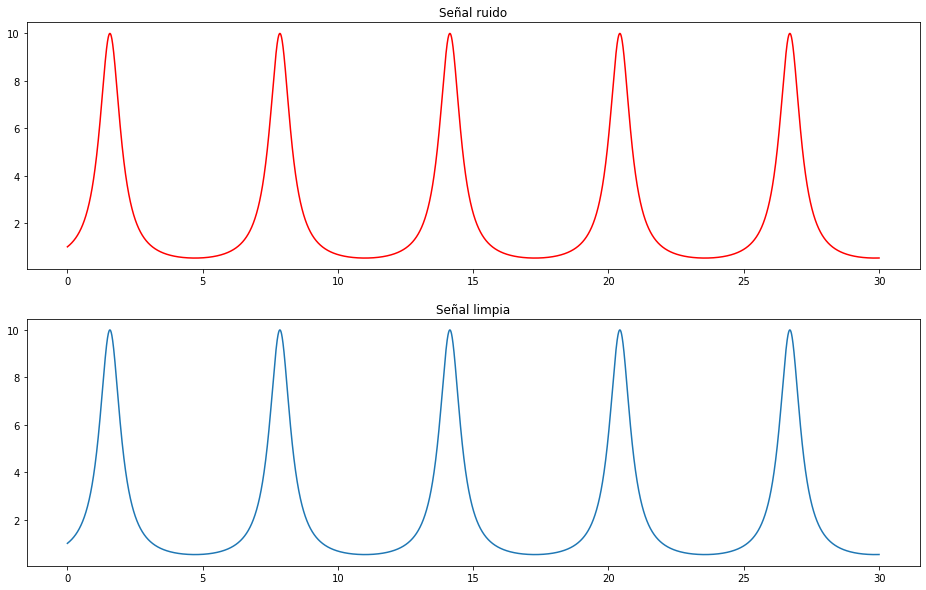

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,10))
ax1.plot(t,x_noisy1, 'r')
#ax1.set_xlim(0,3)
ax1.set_title("Señal ruido")

ax2.plot(t,x_clean)
#ax2.set_xlim(0,3)
ax2.set_title("Señal limpia")

### Señal ruidosa 2 

Text(0.5, 1.0, 'Señal limpia')

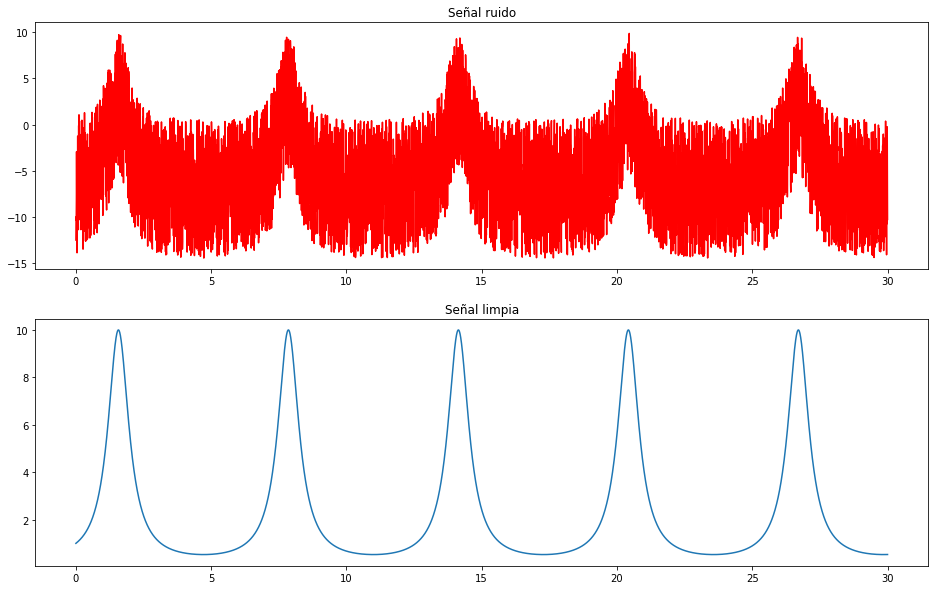

In [8]:
fig, (axx1, axx2) = plt.subplots(2, figsize=(16,10))
axx1.plot(t,x_noisy2, 'r')
#ax1.set_xlim(0,3)
axx1.set_title("Señal ruido")

axx2.plot(t,x_clean)
#ax2.set_xlim(0,3)
axx2.set_title("Señal limpia")

### Señal ruidosa 3

Text(0.5, 1.0, 'Señal limpia')

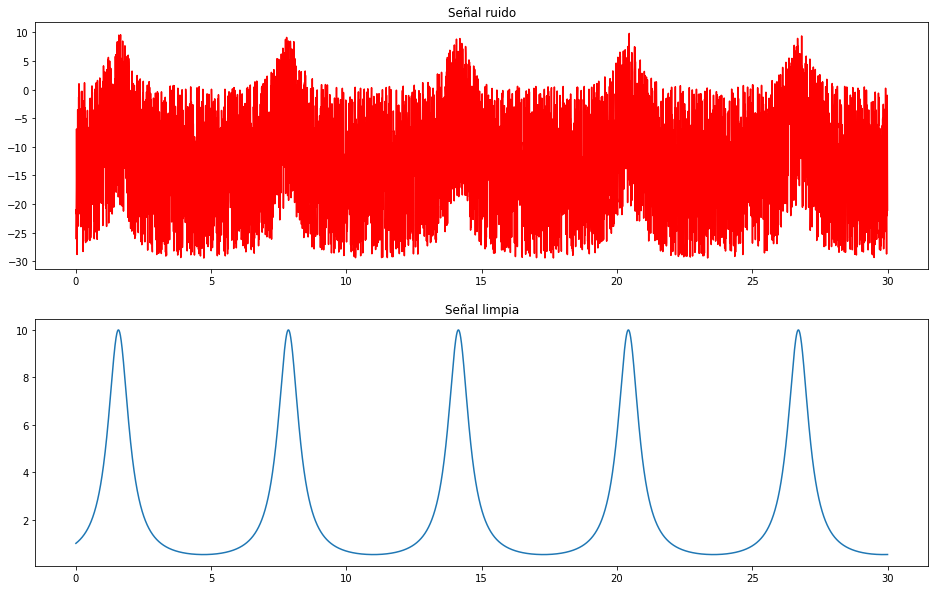

In [9]:
fig, (axxx1, axxx2) = plt.subplots(2, figsize=(16,10))
axxx1.plot(t,x_noisy3, 'r')
#ax1.set_xlim(0,3)
axxx1.set_title("Señal ruido")

axxx2.plot(t,x_clean)
#ax2.set_xlim(0,3)
axxx2.set_title("Señal limpia")

### Señal ruidosa 4

Text(0.5, 1.0, 'Señal limpia')

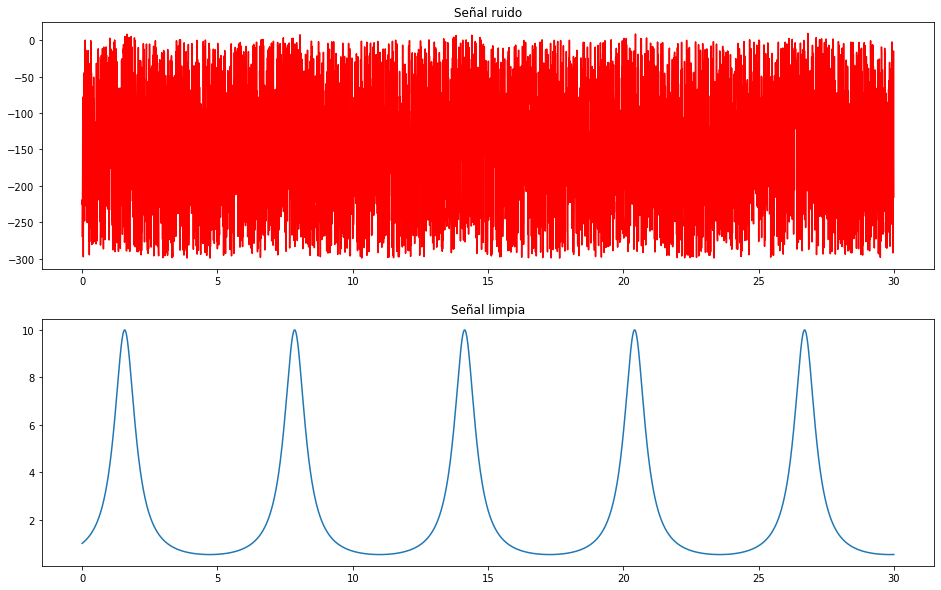

In [10]:
fig, (axxxx1, axxxx2) = plt.subplots(2, figsize=(16,10))
axxxx1.plot(t,x_noisy4, 'r')
#ax1.set_xlim(0,3)
axxxx1.set_title("Señal ruido")

axxxx2.plot(t,x_clean)
#ax2.set_xlim(0,3)
axxxx2.set_title("Señal limpia")

### Espectro de potencia de la señal sin ruido:

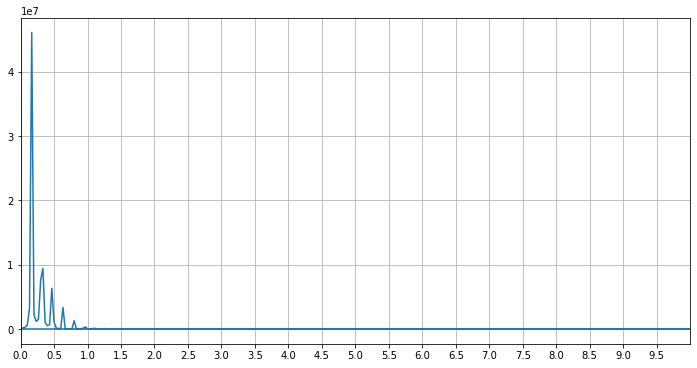

In [11]:
plt.figure(figsize=(12,6))
plt.plot(freq[1::],(np.abs(x_clean_fft)**2)[1::]) #np.abs (magnitud) **2 (al cuadrado)
#plt.plot(freq[1::], np.abs(x_clean_fft)[1::])
plt.xlim(0,10)
plt.xticks(np.arange(0,10,0.5))

plt.grid()

In [12]:
#recon = ifft((np.abs(x_clean_fft)**2))
recon = ifft(np.abs(x_clean_fft)**2)
Sv = recon[4600::]
Svl = list(Sv)
Sl = list(recon)
del Sl[4600::]

Sm = Svl + Sl

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


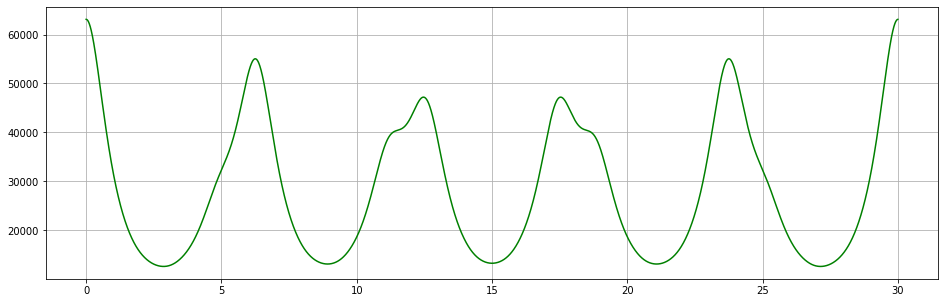

In [13]:
plt.figure(figsize=(16,5))
#plt.plot(t,reconstruccion, 'g')
plt.plot(t,recon, 'g')
plt.grid()

Esto parece demostrar que efectivamente, como se ve al realizar las funciones de autocorrelación de abajo, lo obtenido es |S|^2 (Espectro de potencia). Ahora, si se hace el IFFT al espectro de potencia de esta manera, el resultado (gráfica) es lo mismo para el hecho con función autocorrelación. Entonces al parecer lo de abajo está bien hecho.

En este caso, donde se conoce la FFT (x_clean_fft), es posible volver hacia atrás. Es decir:

Tenemos el espectro de potencia [np.abs(x_clean_fft)^2]. Sabemos que la FFT correspondiente a este espectro de potencia es [x_clean_fft], y entonces con esto podemos volver a hallar la señal [ifft(x_clean_fft)].
Pero esto es posible porque conocemos [x_clean_fft].

Si solo tuvieramos [np.abs(x_clean_fft)^2], ¿cómo hallamos [x_clean_fft]?
Esto es lo que pasa al hallarlo con la función autocorrelación. Conocemos |S|^2, que en este caso vendría siendo [np.abs(x_clean_fft)^2] (la magnitud al cuadrado). Si solo tenemos la magnitud al cuadrado, ¿cómo hacemos para devolvernos? No creo que se pueda.

Update: Creo que al utilizar los arrays llamados "indices", puedo encontrar la FFT limpia correspondiente. Ya que esos índices lo que me dicen es en qué posiciones hay ¿ruido? a través de Trues y Falses, entonces significa que sabemos las posiciones de ruido para [|S|^2] (obtenido de autocorrelación). Si multiplicamos indices * FFT, haremos 0 las posiciones del FFT que dan ruido, entonces al tener ese nuevvo FFT calculamos su IFFT y limpiamos señal. 

(( ESTO EN REALIDAD NO NECESITA DE LA AUTOCORRELACIÓN, SIMPLEMENTE A PARTIR DE LA TRANSFORMADA DE FOURIER SE PUEDE CONSEGUIR )) En realidad esto no es exactamente lo que debería ser, porque con la función autocorrelación, ya deberíamos haber obtenido |[S(w)|^2] límpio. Es decir, deberíamos tener de inmediato el espectro de potencia de la señal límpia, pero no su FFT [S(w)], que es un FFT diferente al de la señal ruidosa. Ese [S(w)] es el que digo que no se puede obtener.

In [14]:
#help(np.abs)

## Funciones de autocorrelación para las señales:

#### Señal 1:

In [15]:
C1 = np.sqrt(2*np.pi)*np.conjugate(x_noisy_fft1)*x_noisy_fft1

S1Limpia = C1/np.sqrt(2*np.pi)
S1Limpia = np.abs(S1Limpia)
S1Limpia2 = S1Limpia.copy()

In [16]:
indices1     = S1Limpia>0.001*10**6
yf_clean1    = indices1 * S1Limpia

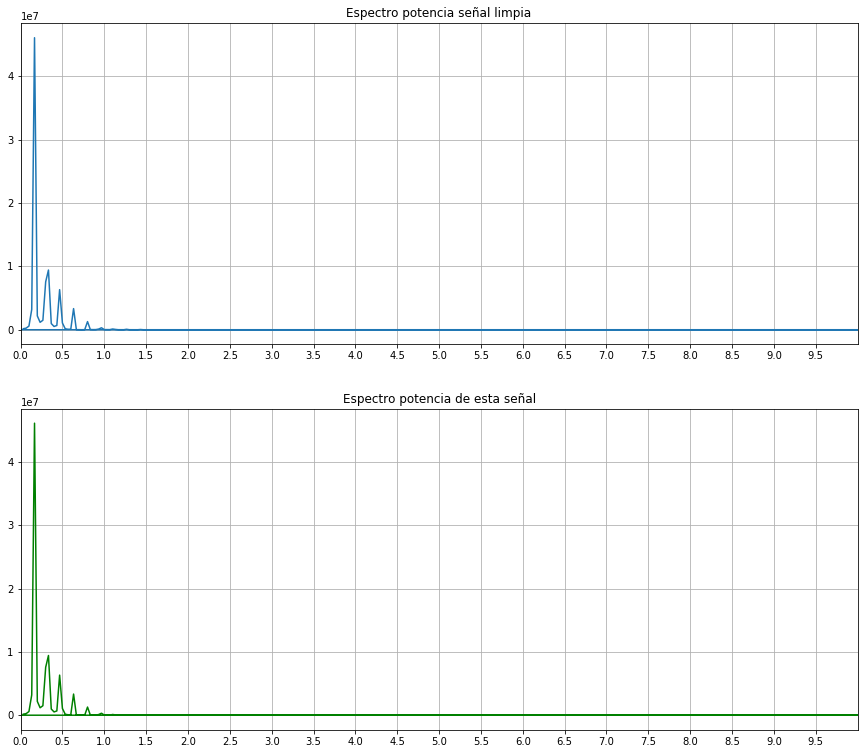

In [17]:
fig, (es1, es2) = plt.subplots(2, figsize=(15,13))
es1.plot(freq[1::],yf_clean1[1::])
es1.set_title("Espectro potencia señal limpia")
es1.set_xlim(0,10)
es1.set_xticks(np.arange(0,10,0.5))
es1.grid()

es2.plot(freq[1:],S1Limpia[1:], 'g')
es2.set_title("Espectro potencia de esta señal")
es2.set_xlim(0,10)
es2.set_xticks(np.arange(0,10,0.5))
es2.grid()

In [18]:
reconstruccion1 = indices1*x_noisy_fft1
reconstruccion1 = ifft(reconstruccion1)
#S1v = reconstruccion1[4600::]
#S1vl = list(S1v)
#S1l = list(reconstruccion1)
#del S1l[4600::]

#S1m = S1vl + S1l

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


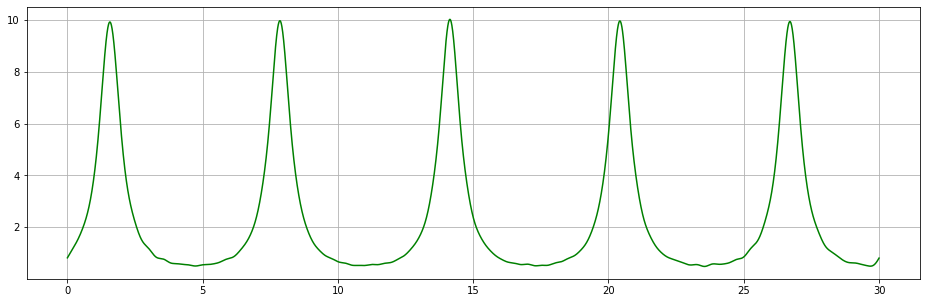

In [19]:
plt.figure(figsize=(16,5))
plt.plot(t,reconstruccion1, 'g')
#plt.plot(t,S1m, 'g')
plt.grid()

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstrucción')

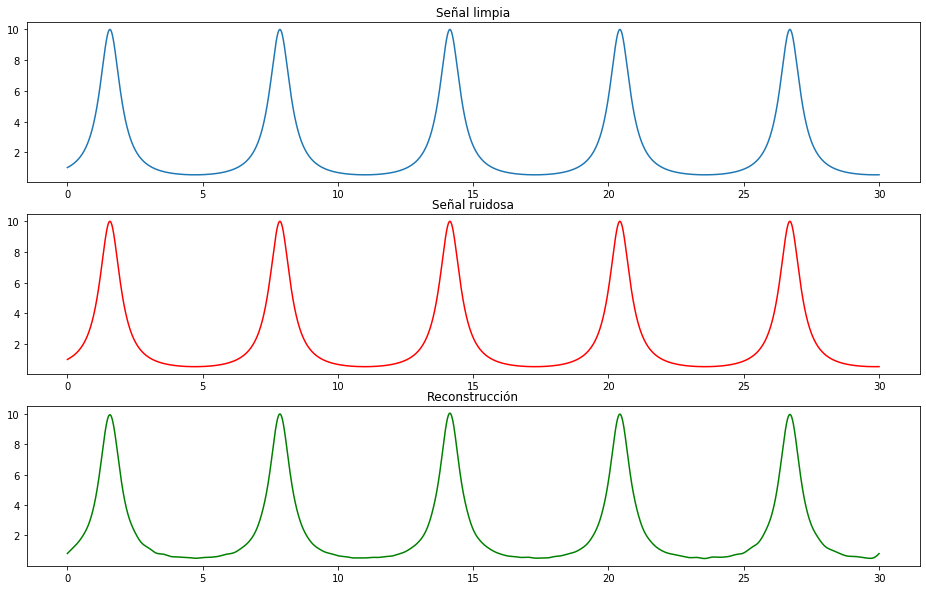

In [20]:
fig, (se1, se2, se3) = plt.subplots(3, figsize=(16,10))
se1.plot(t, x_clean)
se1.set_title("Señal limpia")

se2.plot(t,x_noisy1,'r')
#se2.plot(t[4::],reconstruccion)
se2.set_title("Señal ruidosa")
#cor.plot(np.arange(1, corre.size+1), corre, 'g')
#cor.set_title("Correlación")

se3.plot(t,reconstruccion1,'g')
#se3.plot(t,S1m,'g')
se3.set_title("Reconstrucción")

#### Señal 2

In [21]:
C2 = np.sqrt(2*np.pi)*np.conjugate(x_noisy_fft2)*x_noisy_fft2

S2Limpia = C2/np.sqrt(2*np.pi)
S2Limpia = np.abs(S2Limpia)
S2Limpia2 = S2Limpia.copy()

In [22]:
#indices     = Limpia>0.4*10**6#max(Limpia)-0.1
#yf_clean    = indices * Limpia
#indices     = Limpia2>0.15*10**6#max(Limpia)-0.1

indices2    = S2Limpia2>0.09*10**7
yf_clean2  = indices2 * S2Limpia2

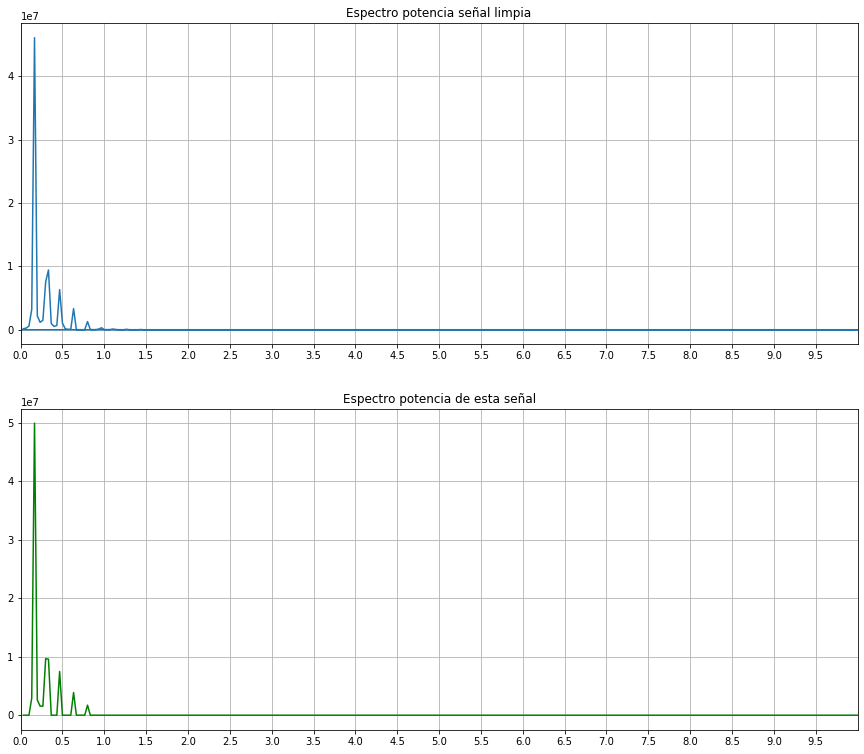

In [43]:
fig, (es1, es2) = plt.subplots(2, figsize=(15,13))
es1.plot(freq[1::],(np.abs(x_clean_fft)**2)[1::])
es1.set_title("Espectro potencia señal limpia")
es1.set_xlim(0,10)
es1.set_xticks(np.arange(0,10,0.5))
es1.grid()

es2.plot(freq[1:len(yf_clean2)//2],yf_clean2[1:len(yf_clean2)//2], 'g')
es2.set_title("Espectro potencia de esta señal")
es2.set_xlim(0,10)
es2.set_xticks(np.arange(0,10,0.5))
es2.grid()

In [24]:
#np.where(reconstruccion2 == max(reconstruccion2))

In [48]:
reconstruccion2 = indices2*x_noisy_fft2
reconstruccion2 = ifft(reconstruccion2)
#S1v = reconstruccion1[4600::]
#S1vl = list(S1v)
#S1l = list(reconstruccion1)
#del S1l[4600::]

#S1m = S1vl + S1l

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


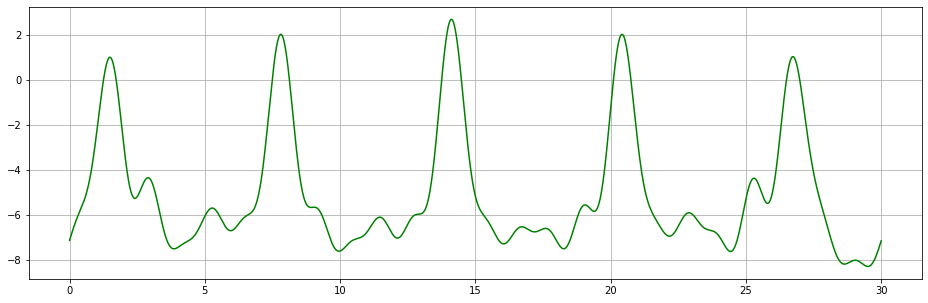

In [49]:
plt.figure(figsize=(16,5))
plt.plot(t,reconstruccion2, 'g')
#plt.plot(t[1::],S2m, 'g')
plt.grid()

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstrucción')

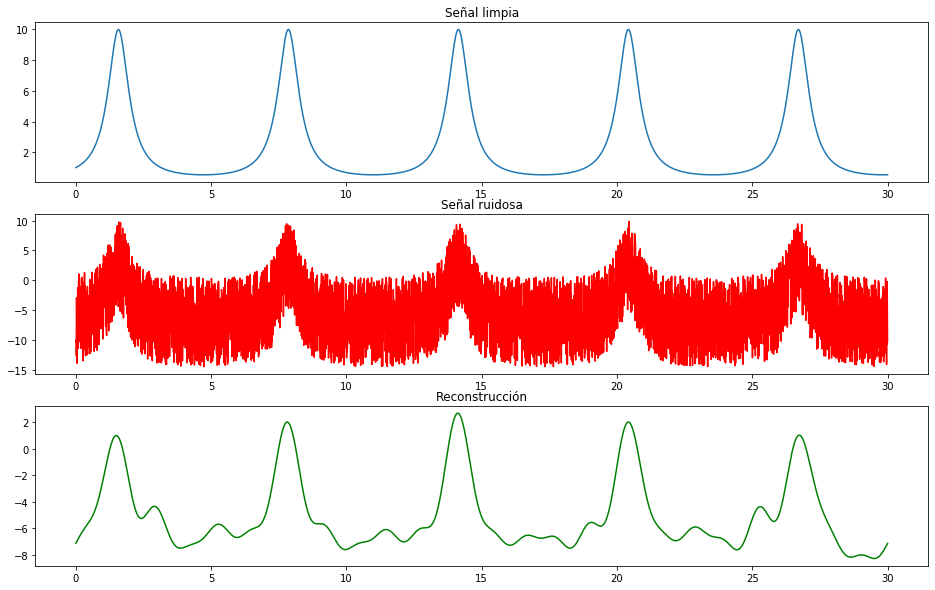

In [27]:
fig, (se1, se2, se3) = plt.subplots(3, figsize=(16,10))
se1.plot(t, x_clean)
se1.set_title("Señal limpia")

se2.plot(t,x_noisy2,'r')
#se2.plot(t[4::],reconstruccion)
se2.set_title("Señal ruidosa")
#cor.plot(np.arange(1, corre.size+1), corre, 'g')
#cor.set_title("Correlación")

#se3.plot(t,reconstruccion,'g')
se3.plot(t,reconstruccion2,'g')
se3.set_title("Reconstrucción")

#### Señal 3

In [28]:
C3 = np.sqrt(2*np.pi)*np.conjugate(x_noisy_fft3)*x_noisy_fft3

S3Limpia = C3/np.sqrt(2*np.pi)
S3Limpia = np.abs(S3Limpia)
S3Limpia2 = S3Limpia.copy()

In [29]:
#indices     = Limpia>0.4*10**6#max(Limpia)-0.1
#yf_clean    = indices * Limpia
#indices     = Limpia2>0.15*10**6#max(Limpia)-0.1

indices3    = S3Limpia2>0.18*10**7
yf_clean3  = indices3 * S3Limpia2

In [30]:
print(len(x_noisy_fft3))
print(len(indices3))

5000
5000


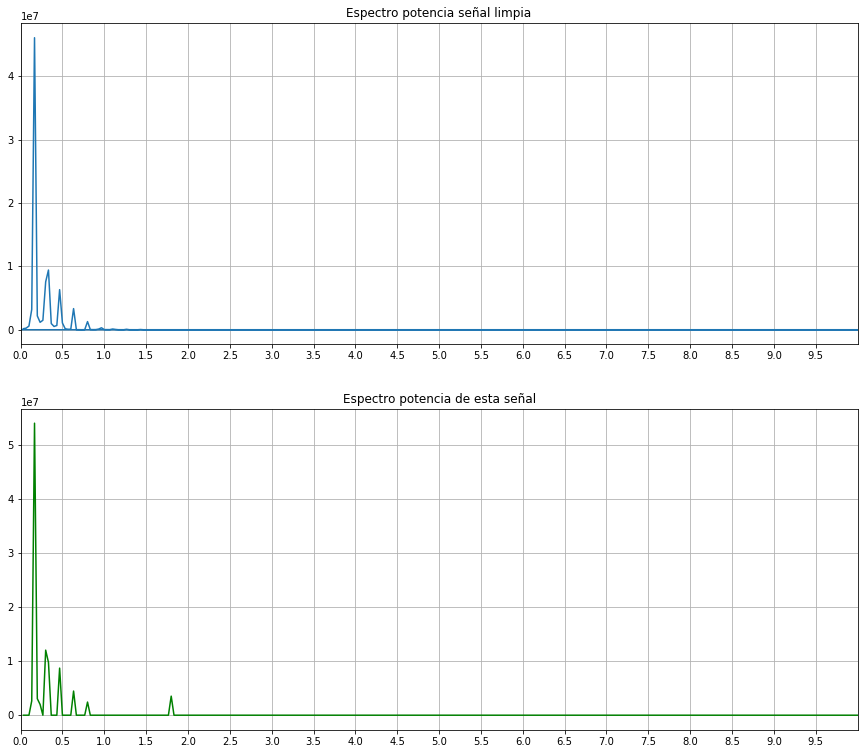

In [45]:
fig, (es1, es2) = plt.subplots(2, figsize=(15,13))
es1.plot(freq[1::],(np.abs(x_clean_fft)**2)[1::])
es1.set_title("Espectro potencia señal limpia")
es1.set_xlim(0,10)
es1.set_xticks(np.arange(0,10,0.5))
es1.grid()

es2.plot(freq[1:len(yf_clean3)//2],yf_clean3[1:len(yf_clean3)//2], 'g')
es2.set_title("Espectro potencia de esta señal")
es2.set_xlim(0,10)
es2.set_xticks(np.arange(0,10,0.5))
es2.grid()

In [32]:
reconstruccion3 = indices3*x_noisy_fft3
reconstruccion3 = ifft(reconstruccion3)
#S1v = reconstruccion1[4600::]
#S1vl = list(S1v)
#S1l = list(reconstruccion1)
#del S1l[4600::]

#S1m = S1vl + S1l

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


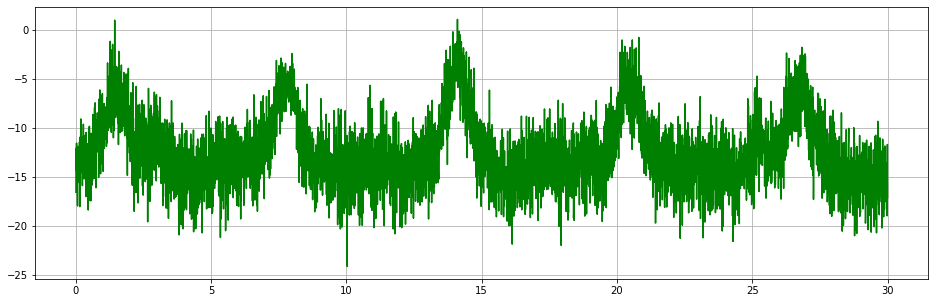

In [33]:
plt.figure(figsize=(16,5))
plt.plot(t,reconstruccion3, 'g')
#plt.plot(t[1::],S3m, 'g')
plt.grid()

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstrucción')

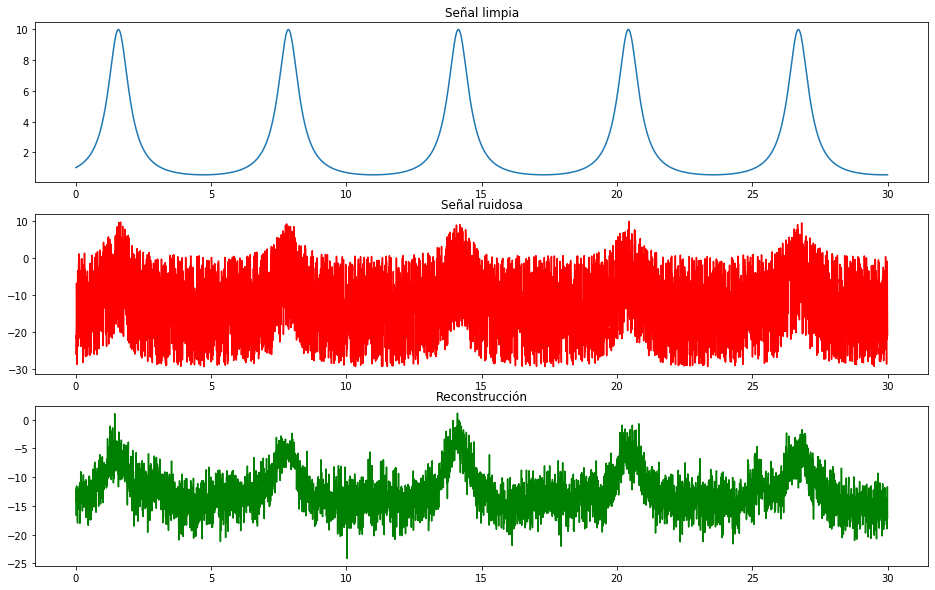

In [34]:
fig, (se1, se2, se3) = plt.subplots(3, figsize=(16,10))
se1.plot(t, x_clean)
se1.set_title("Señal limpia")

se2.plot(t,x_noisy3,'r')
#se2.plot(t[4::],reconstruccion)
se2.set_title("Señal ruidosa")
#cor.plot(np.arange(1, corre.size+1), corre, 'g')
#cor.set_title("Correlación")

#se3.plot(t,reconstruccion,'g')
se3.plot(t,reconstruccion3,'g')
se3.set_title("Reconstrucción")

#### Señal 4

In [35]:
C4 = np.sqrt(2*np.pi)*np.conjugate(x_noisy_fft4)*x_noisy_fft4

S4Limpia = C4/np.sqrt(2*np.pi)
S4Limpia = np.abs(S4Limpia)
S4Limpia2 = S4Limpia.copy()

In [36]:
#indices     = Limpia>0.4*10**6#max(Limpia)-0.1
#yf_clean    = indices * Limpia
#indices     = Limpia2>0.15*10**6#max(Limpia)-0.1

indices4    = S4Limpia2>0.01*10**6
yf_clean4  = indices4 * S4Limpia2

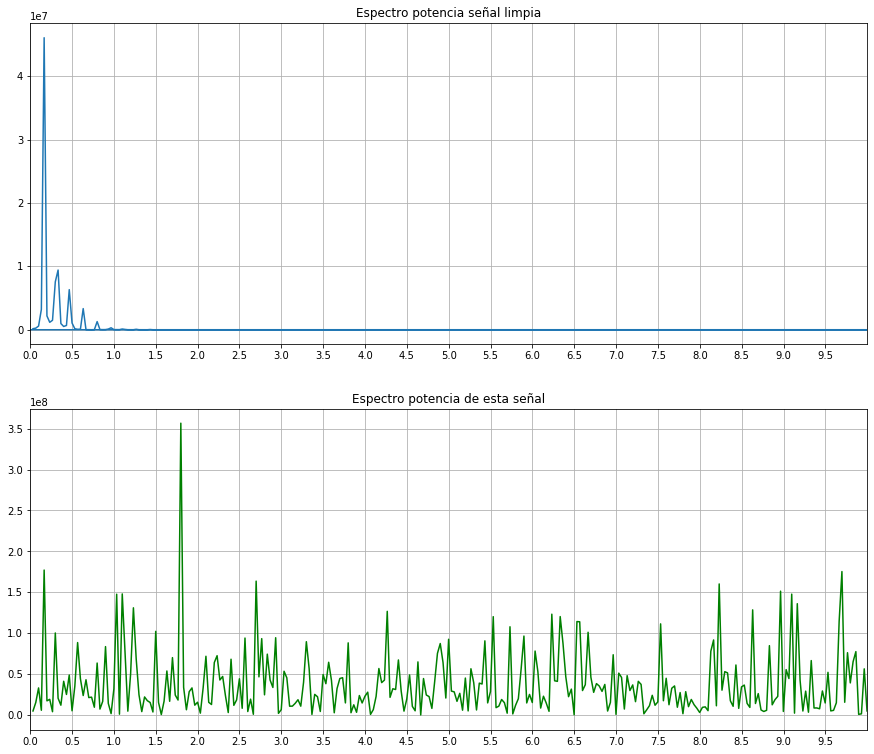

In [37]:
fig, (es1, es2) = plt.subplots(2, figsize=(15,13))
es1.plot(freq[1::],(np.abs(x_clean_fft)**2)[1::])
es1.set_title("Espectro potencia señal limpia")
es1.set_xlim(0,10)
es1.set_xticks(np.arange(0,10,0.5))
es1.grid()

es2.plot(freq[1:2500],yf_clean4[1:2500], 'g')
es2.set_title("Espectro potencia de esta señal")
es2.set_xlim(0,10)
es2.set_xticks(np.arange(0,10,0.5))
es2.grid()

In [38]:
reconstruccion4 = indices4*x_noisy_fft4
reconstruccion4 = ifft(reconstruccion4)
#S1v = reconstruccion1[4600::]
#S1vl = list(S1v)
#S1l = list(reconstruccion1)
#del S1l[4600::]

#S1m = S1vl + S1l

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


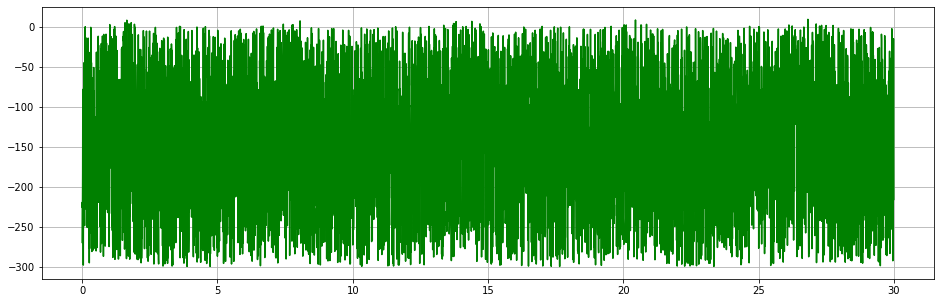

In [39]:
plt.figure(figsize=(16,5))
#plt.plot(t,reconstruccion, 'g')
plt.plot(t,reconstruccion4, 'g')
plt.grid()

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstrucción')

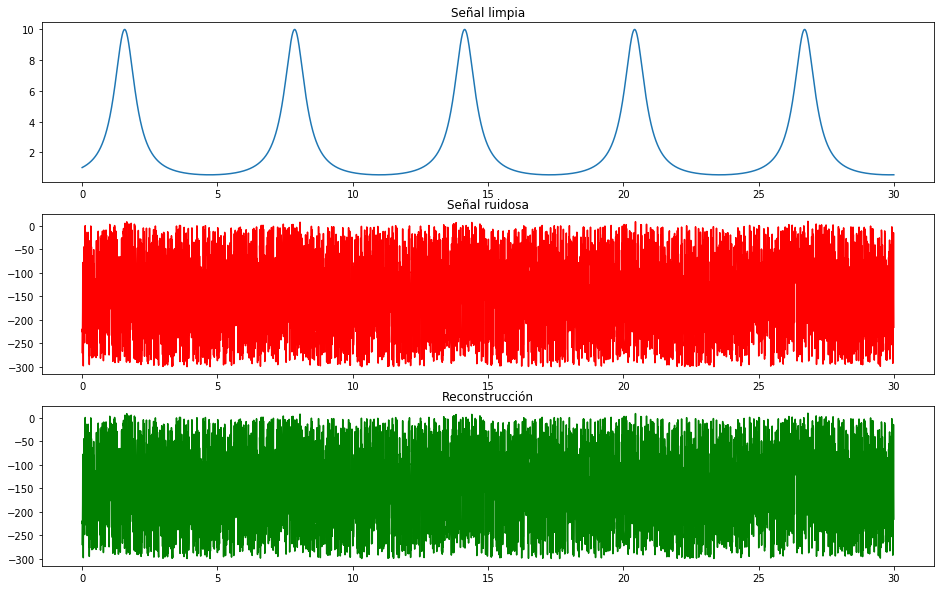

In [40]:
fig, (se1, se2, se3) = plt.subplots(3, figsize=(16,10))
se1.plot(t, x_clean)
se1.set_title("Señal limpia")

se2.plot(t,x_noisy4,'r')
#se2.plot(t[4::],reconstruccion)
se2.set_title("Señal ruidosa")
#cor.plot(np.arange(1, corre.size+1), corre, 'g')
#cor.set_title("Correlación")

#se3.plot(t,reconstruccion,'g')
se3.plot(t,reconstruccion4,'g')
se3.set_title("Reconstrucción")

Tiene más sentido que se recupere con 0 ruido? NO